In [1]:
import pandas as pd
import numpy as np

In [2]:
FILE_PATH = '/content/drive/MyDrive/AIO 2024/Module_5/Week 1/T4/data/iris_1D.csv'

In [3]:
df = pd.read_csv(FILE_PATH)
df

,Petal_Length,Label
0,1.4,0.0
1,1.0,0.0
2,1.5,0.0
3,3.0,1.0
4,3.8,1.0
5,4.1,1.0


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
X, y

(array([[1.4],
        [1. ],
        [1.5],
        [3. ],
        [3.8],
        [4.1]]),
 array([0., 0., 0., 1., 1., 1.]))

In [6]:
# Nên chuyển về vector dạng cột -> chuyển về dạng ma trận N dòng 1 cột -> Chuẩn với toán học
class LogisticRegression_LossMSE:
    def __init__(self,lr = 0.01, batch_size = 1, epochs = 100, shuffle = False, thresshold = 0.5, random_state = 42, w = None):
        self.lr = lr # learning rate
        self.batch_size = batch_size # num sample to training
        self.epochs = epochs # epoch: Number of times the model is learned in all data
        self.shuffle = shuffle # allow shuffle data in each epoch
        if w is None:
          self.w = None # weight of model
        else:
          self.w = w.reshape(-1,1)
        self.Nfeature = None # number of feature of data train
        self.Nsample = None # number of sample of data train
        self.Losses = [] # List of loss of each epoch
        self.thresshold = thresshold # threshold to split label
        np.random.seed(random_state)
    # check dimension of X
    def checkDim(self,X):
        if X.ndim == 1:
            raise ValueError("X must be 2 Dimensional")
        return 1
    # add feature have value = 1 on head each sample
    def addfeature1(self,X):
        if self.checkDim(X):
            if X.shape[1] == self.Nfeature + 1: return X
            else:
                feature1 = np.ones(X.shape[0]).reshape(-1,1)
                return np.concatenate((feature1,X),axis = 1)
    # function predict probability
    def predict_proba(self,X):
        X = self.addfeature1(X)
        z = X@self.w
        return 1/(1+np.exp(-z)) # sigmoid function


    # def function predict
    def predict(self,X):
      y_proba = self.predict_proba(X)
      return np.where(y_proba >= self.thresshold,1,0)


    # Compute Loss
    def compute_loss(self,y_pred,y):
        return np.mean((y_pred-y)**2)/2

    # Compute gradient Loss with w
    # Loss = 1/2m *(y_pred-y)^2 -> m is bacth_size
    def dL_dw(self,y_pred,y,X):
        return X.T@((y_pred - y)*y_pred*(1-y_pred))/X.shape[0] # / for X.shape[0] because the sample of X != batch_size

    # function training model
    def fit(self,X,y):
        self.Nsample, self.Nfeature = X.shape
        # add feature 1 for X
        X = self.addfeature1(X)
        y = y.reshape(-1,1)
        if self.w is None:
          self.w = np.random.uniform(-1,1,size= self.Nfeature+1).reshape(-1,1)# w is matrix have shape (Nfeatur,1)
        data_train = np.concatenate((X,y),axis = 1)
        for epoch in range(self.epochs):
            if self.shuffle: np.random.shuffle(data_train)
            Loss = [] # Loss of 1 epoch
            for i in range(0,self.Nsample,self.batch_size):
                batch = data_train[i:i+self.batch_size]
                X_train, ytrain = batch[:,:-1], batch[:,-1].reshape(-1,1)
                y_proba = self.predict_proba(X_train)
                loss = self.compute_loss(y_proba,ytrain)
                Loss.append(loss) # append loss of each batch
                dL_dw = self.dL_dw(y_proba,ytrain,X_train)
                self.w -= self.lr*dL_dw
            self.Losses.append(sum(Loss)/len(Loss))
            print(f"epoch: {epoch+1:<5} ====== Loss = {self.Losses[-1].item():<10.4f} =============== w = {str(self.w.reshape(1,-1)):<20}")

# **Huấn luyện mô hình Logistic Regression với Loss = MSE với bộ Dữ liêu trên**

In [7]:
clf = LogisticRegression_LossMSE(lr = 0.01, batch_size = 1, epochs = 300, shuffle = False)
clf.fit(X,y)

epoch: 1     ====== Loss = 0.1282     =============== w = [[-0.25515672  0.8961093 ]]
epoch: 2     ====== Loss = 0.1274     =============== w = [[-0.25939726  0.89079099]]
epoch: 3     ====== Loss = 0.1267     =============== w = [[-0.26364095  0.88547454]]
epoch: 4     ====== Loss = 0.1259     =============== w = [[-0.26788733  0.88016081]]
epoch: 5     ====== Loss = 0.1251     =============== w = [[-0.27213596  0.87485069]]
epoch: 6     ====== Loss = 0.1244     =============== w = [[-0.27638637  0.86954511]]
epoch: 7     ====== Loss = 0.1236     =============== w = [[-0.28063809  0.86424499]]
epoch: 8     ====== Loss = 0.1228     =============== w = [[-0.28489064  0.85895129]]
epoch: 9     ====== Loss = 0.1221     =============== w = [[-0.28914353  0.85366498]]
epoch: 10    ====== Loss = 0.1213     =============== w = [[-0.29339628  0.84838705]]
epoch: 11    ====== Loss = 0.1205     =============== w = [[-0.29764839  0.84311852]]
epoch: 12    ====== Loss = 0.1198     =============== 

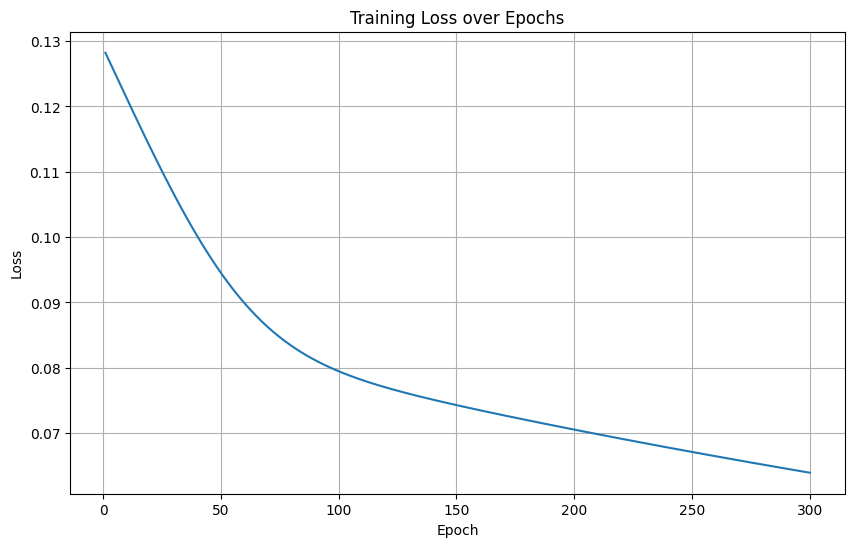

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, clf.epochs + 1), clf.Losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

In [9]:
# y_train
y

array([0., 0., 0., 1., 1., 1.])

In [10]:
# y_pred
clf.predict(X)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])

# **Loss không phải là Convex function**

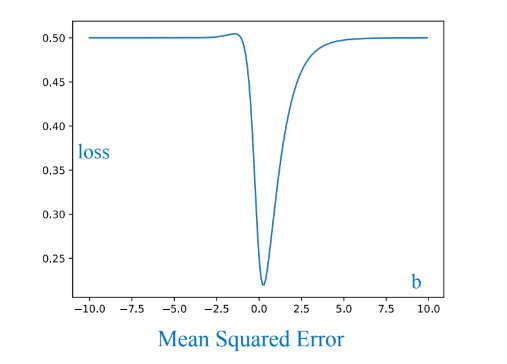

In [11]:
# Chỉ thay đổi khoảng ngẫu nhiên của w0 hay b để kiểm nghiệm tính convex hay điểm tối ưu cục bộ

In [12]:
w1 = np.array([-10.0,1.0]) # nếu  w random đúng điểm này rơi vào tối ưu cục bộ

In [13]:
w2 = np.array([-1.0,1.0]) # nếu w random đúng điểm này rơi vào toàn bộ

In [14]:
clf1 = LogisticRegression_LossMSE(lr = 0.01, batch_size = 1, epochs = 300, shuffle = False, w = w2)

In [15]:
clf1.fit(X,y)

epoch: 1     ====== Loss = 0.0844     =============== w = [[-1.00396719  0.99513384]]
epoch: 2     ====== Loss = 0.0838     =============== w = [[-1.00791712  0.99030172]]
epoch: 3     ====== Loss = 0.0831     =============== w = [[-1.0118494   0.98550449]]
epoch: 4     ====== Loss = 0.0825     =============== w = [[-1.01576368  0.98074298]]
epoch: 5     ====== Loss = 0.0818     =============== w = [[-1.0196596  0.976018 ]]
epoch: 6     ====== Loss = 0.0812     =============== w = [[-1.0235368   0.97133039]]
epoch: 7     ====== Loss = 0.0806     =============== w = [[-1.02739497  0.96668092]]
epoch: 8     ====== Loss = 0.0800     =============== w = [[-1.03123376  0.9620704 ]]
epoch: 9     ====== Loss = 0.0794     =============== w = [[-1.03505285  0.9574996 ]]
epoch: 10    ====== Loss = 0.0788     =============== w = [[-1.03885194  0.95296928]]
epoch: 11    ====== Loss = 0.0782     =============== w = [[-1.04263073  0.94848019]]
epoch: 12    ====== Loss = 0.0777     =============== w 

In [16]:
clf1.predict(X)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])

In [19]:
clf1 = LogisticRegression_LossMSE(lr = 0.01, batch_size = 1, epochs = 300, shuffle = False, w = w1)

In [21]:
clf1.fit(X,y)

epoch: 1     ====== Loss = 0.2491     =============== w = [[-9.99994355  1.00021539]]
epoch: 2     ====== Loss = 0.2491     =============== w = [[-9.99988705  1.00043097]]
epoch: 3     ====== Loss = 0.2491     =============== w = [[-9.9998305   1.00064674]]
epoch: 4     ====== Loss = 0.2491     =============== w = [[-9.99977391  1.0008627 ]]
epoch: 5     ====== Loss = 0.2491     =============== w = [[-9.99971726  1.00107885]]
epoch: 6     ====== Loss = 0.2491     =============== w = [[-9.99966056  1.00129519]]
epoch: 7     ====== Loss = 0.2491     =============== w = [[-9.99960382  1.00151172]]
epoch: 8     ====== Loss = 0.2491     =============== w = [[-9.99954702  1.00172845]]
epoch: 9     ====== Loss = 0.2490     =============== w = [[-9.99949017  1.00194536]]
epoch: 10    ====== Loss = 0.2490     =============== w = [[-9.99943328  1.00216247]]
epoch: 11    ====== Loss = 0.2490     =============== w = [[-9.99937633  1.00237978]]
epoch: 12    ====== Loss = 0.2490     =============== 

In [22]:
clf1.predict(X)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0]])